In [2]:
import pandas as pd

data = pd.read_csv("artifacts/data_ingestion/train.csv")

## Target Variable Distribution

The target values denote whether a tweet is about a real disaster (1) or not (0)

In [6]:
import yaml 
# Load the YAML file
with open('../schema.yaml', 'r') as yaml_file:
    yaml_data = yaml.safe_load(yaml_file)

# Access the variable
target = yaml_data['TARGET_COLUMN']['name']
data[target]

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

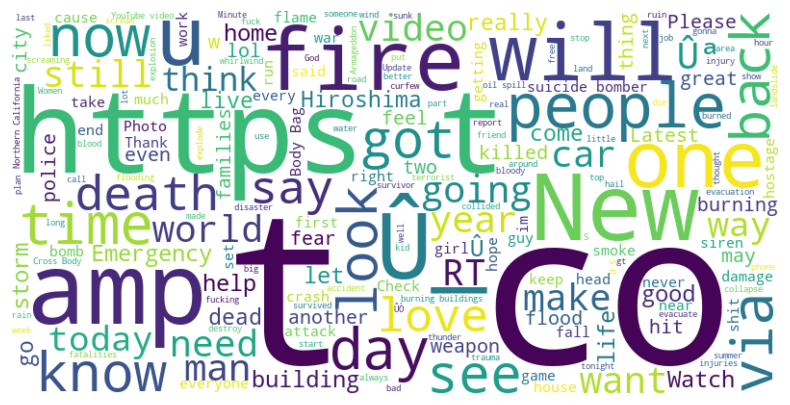

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_text = " ".join(text for text in data["text"])

# Générer un word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

#  Affichage du wordcloud en utilisant matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

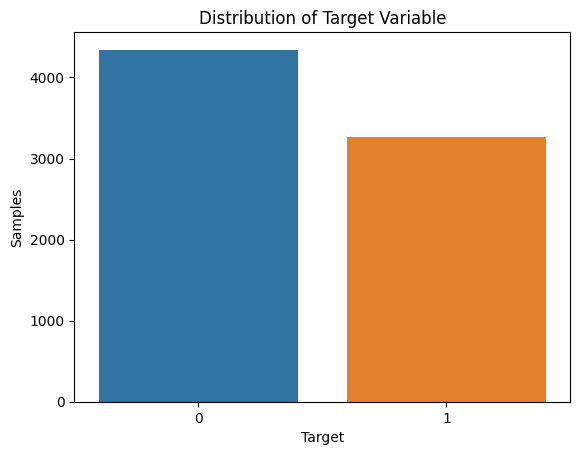

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

x = data[target].value_counts()


sns.barplot(x=x.index, y=x)
plt.ylabel('Samples')
plt.xlabel('Target')
plt.title('Distribution of Target Variable')
plt.show()

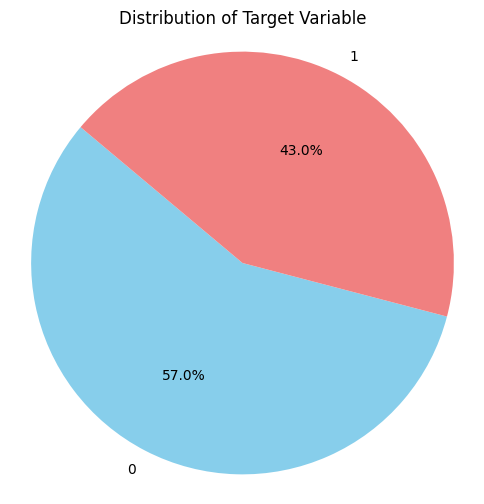

In [12]:
plt.figure(figsize=(6, 6))
plt.pie(x, labels=x.index, autopct="%1.1f%%", startangle=140, colors=["skyblue", "lightcoral"])
plt.title('Distribution of Target Variable')
plt.axis("equal")  
plt.show()

### The distribution of the target variable based on different keywords in the DataFrame

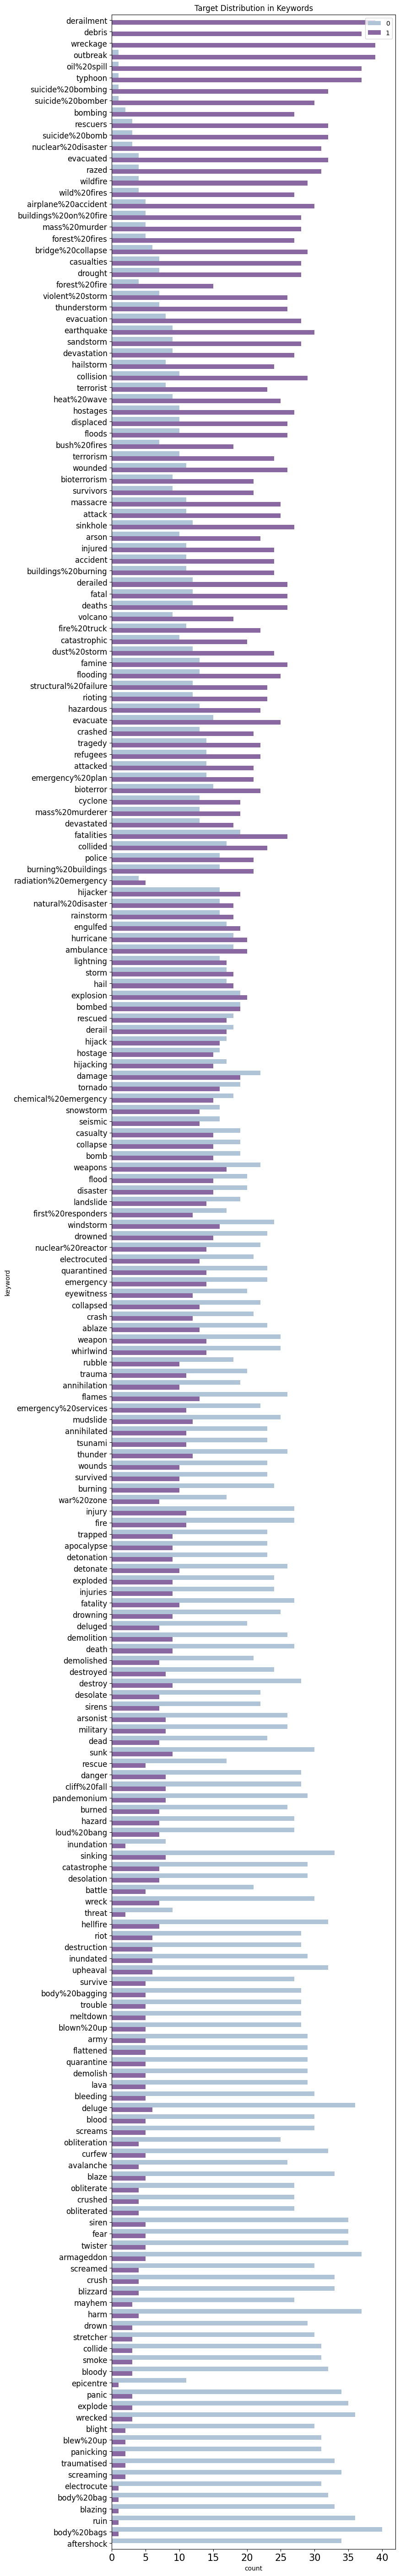

In [13]:
# Calculate the mean target value for each keyword
data['target_mean'] = data.groupby('keyword')['target'].transform('mean')

# Sort the DataFrame by target_mean in descending order
data_sorted = data.sort_values(by='target_mean', ascending=False)

# Create the figure and plot
fig = plt.figure(figsize=(8, 72), dpi=100)
sns.countplot(
    y=data_sorted['keyword'],
    hue=data_sorted['target'],
    palette="BuPu"
)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')
plt.show()

### The top 15 keywords based on their frequencies in the DataFrame

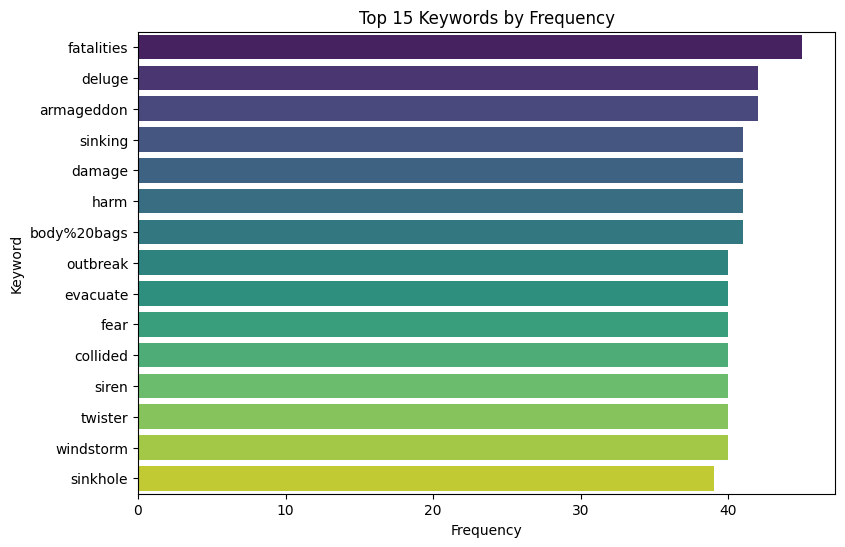

In [14]:
plt.figure(figsize=(9, 6))
sns.countplot(
    y=data['keyword'],
    order=data['keyword'].value_counts().iloc[:15].index,
    palette="viridis"  # You can customize the color palette if desired
)
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.title('Top 15 Keywords by Frequency')
plt.show()
